In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 43.4 MB/s 
     |████████████████████████████████| 86 kB 6.0 MB/s 
     |████████████████████████████████| 448 kB 37.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
okt = Okt()
import matplotlib.font_manager as fm
import re
from PIL import Image
from io import BytesIO 
import datetime
from collections import Counter

In [ ]:
labels = ['place','date','messenger','category','type','due','summary','name','phone','email','detail','receive','address','end','period','address_detail','result','result_detail','sign','etc']
data_arp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sounds/sounds_place_arparking.csv', names = labels, encoding='cp949')
data_arp.head()

,place,date,messenger,category,type,due,summary,name,phone,email,detail,receive,address,end,period,address_detail,result,result_detail,sign,etc
NaN,place,date,messenger,category,type,due,summary,name,phone,email,detail,receive,address,end,period,address_detail,result,result_detail,sign,etc
366.0,아름동주차장,2020-06-12,시민의소리,기타,칭찬,7,친절한 설명 너무 감사드립니다.,김준연,010-5021-9817,--,금일 오후 6시경 퇴근시간이 다 다가옴에도 불구하고 아름동 공영주차장 관련하여 문의...,이연실,이연실,2020-06-15,1,안녕하세요. 기획감사실 CS담당 이연실입니다. 먼저 소중한 칭찬글을 올려주셔서 진심...,조치완료(진행),--,O,--
347.0,아름동주차장,2020-05-13,현장접수,시설/환경,건의,14,입/출차시 안전사고 예방 위한 개선 요구,--,010-9789-8883,--,아름동공영주차장 출입구 쪽에서 나오는 차량과 민원인의 자녀가 부딪힐뻔하여 입/출차시...,황세희,강민,2020-05-13,0,안전사고 예방 위한 개선 조치를 취할 것이라고 설명\r\n- 출차 시 내리막구조의 ...,조치완료(진행),--,O,"※개선 계획(체육주차팀-3583, 2020.5.30.) 수립 및 조치 완료"
196.0,아름동주차장,2018-12-21,시민의소리,운영체계,건의,14,"도담동, 종촌, 아름주차장 할인제도 확대 건의",윤지혜,010-3324-7117,--,공영주차장 할인제도의 확대를 건의합니다. 현재 국가적으로 출산장려정책을 펴고 있고 ...,유연희,정회권,2018-12-26,3,안녕하세요. 세종시설공단 복지사업팀입니다. \r\n먼저 우리 공단과 우리 공단이 운...,조치완료(진행),--,O,--
179.0,아름동주차장,2018-11-13,고객카드,운영체계,건의,14,주차요금관련 민원,손상근,010-9660-7561,--,"주변 소아과 때문에 오는데 접수하고 대기하다 진료 받고 나가면, 병원비보다 주차비가...",강민,강민,2018-11-19,6,세종시 주차장 설치 조례에 따라 요금 운영 중으로 공단자체적으로 요금변경은 불가함을...,조치완료(진행),--,O,--


In [ ]:
circle_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/circle_img.jpg'))

In [ ]:
arp_detail = data_arp['detail']
arp_d_tolist = arp_detail.values.tolist()
arp_d_list = ''
for i in arp_d_tolist:
  arp_d_list += i
arp_d_nouns = okt.nouns(arp_d_list)
arp_d_n = ''
for i in arp_d_nouns:
  arp_d_n += i+' '
arp_d_nouns_count = Counter(arp_d_nouns)
stopwords = set(STOPWORDS)
stopwords.update(['주차장','아름동'])

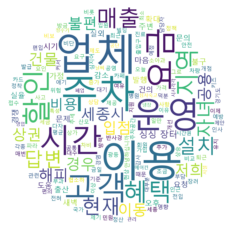

In [ ]:
wd_arp_d = WordCloud(max_font_size=200,background_color="white",mask=circle_mask,font_path='/content/drive/MyDrive/Colab Notebooks/sounds/malgun.ttf',stopwords=stopwords).generate(arp_d_n)
fig = plt.figure()
plt.imshow(wd_arp_d, interpolation='bilinear')
plt.axis('off')
wd_arp_d.to_file(filename='/content/drive/MyDrive/Colab Notebooks/wordcloud_img/wd_arp_d.jpg')

In [9]:
arp_question = data_arp[data_arp['type'] == "질의"]
arp_question_detail = arp_question['detail']

arp_check = data_arp[data_arp['type'] == "확인"]
arp_check_detail = arp_check['detail']

arp_request = data_arp[data_arp['type'] == "건의"]
arp_request_detail = arp_request['detail']

질의

In [ ]:
arp_qd_tolist = arp_question_detail.values.tolist()
arp_qd_list = ''
for i in arp_qd_tolist:
  arp_qd_list += i

In [ ]:
arp_qd_nouns = okt.nouns(arp_qd_list)
arp_qd_n = ''
for i in arp_qd_nouns:
  arp_qd_n += i+' '

In [ ]:
arp_qd_nouns_count = Counter(arp_qd_nouns)
arp_qd_nouns_count

Counter({'건물': 2,
         '기준': 1,
         '답변': 1,
         '밤': 2,
         '부과': 1,
         '빌딩': 1,
         '새벽': 2,
         '시간': 4,
         '싱싱': 1,
         '아름동': 1,
         '애기': 1,
         '옆': 1,
         '오늘': 1,
         '오후': 1,
         '요금': 3,
         '운영': 2,
         '이용': 1,
         '입원': 1,
         '장터': 1,
         '정산': 1,
         '주차': 3,
         '주차장': 1})

In [ ]:
stopwords = set(STOPWORDS)
# stopwords.update(['모집', '임대', '아파트', '행복'])

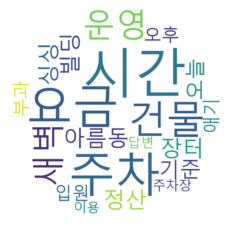

In [ ]:
wd_arp_qd = WordCloud(max_font_size=250,background_color="white",mask=circle_mask,font_path='/content/drive/MyDrive/Colab Notebooks/sounds/malgun.ttf',stopwords=stopwords).generate(arp_qd_n)
fig = plt.figure()
plt.imshow(wd_arp_qd, interpolation='bilinear')
plt.axis('off')
wd_arp_qd.to_file(filename='/content/drive/MyDrive/Colab Notebooks/wordcloud_img/wd_arp_qd.jpg')

확인(=0)

In [ ]:
arp_cd_tolist = arp_check_detail.values.tolist()
arp_cd_list = ''
for i in arp_cd_tolist:
  arp_cd_list += i

In [ ]:
arp_cd_nouns = okt.nouns(arp_cd_list)
arp_cd_n = ''
for i in arp_cd_nouns:
  arp_cd_n += i+' '

In [ ]:
arp_cd_nouns_count = Counter(arp_cd_nouns)
arp_cd_nouns_count

Counter()

In [ ]:
stopwords = set(STOPWORDS)
# stopwords.update(['모집', '임대', '아파트', '행복'])

In [ ]:
wd_arp_cd = WordCloud(max_font_size=300,background_color="white",mask=circle_mask,font_path='/content/drive/MyDrive/Colab Notebooks/sounds/malgun.ttf',stopwords=stopwords).generate(arp_cd_n)
fig = plt.figure()
plt.imshow(wd_arp_cd, interpolation='bilinear')
plt.axis('off')
wd_arp_cd.to_file(filename='/content/drive/MyDrive/Colab Notebooks/wordcloud_img/wd_arp_cd.jpg')

건의

In [10]:
arp_rd_tolist = arp_request_detail.values.tolist()
arp_rd_list = ''
for i in arp_rd_tolist:
  arp_rd_list += i

In [11]:
arp_rd_nouns = okt.nouns(arp_rd_list)
arp_rd_n = ''
for i in arp_rd_nouns:
  arp_rd_n += i+' '

In [12]:
arp_rd_nouns_count = Counter(arp_rd_nouns)
arp_rd_nouns_count

Counter({'가격': 1,
         '가정': 2,
         '각종': 1,
         '감소': 2,
         '개선': 1,
         '개점': 1,
         '건물': 1,
         '건의': 2,
         '경영': 1,
         '경우': 3,
         '경쟁': 2,
         '고객': 5,
         '공단': 1,
         '공용': 3,
         '공통': 1,
         '관리': 1,
         '광등': 1,
         '국가': 1,
         '그로': 1,
         '기': 1,
         '날씨': 1,
         '내': 1,
         '냉장': 1,
         '녀': 1,
         '니': 1,
         '다자': 1,
         '담당자': 1,
         '대기': 1,
         '대부분': 1,
         '대수': 1,
         '더': 2,
         '도움': 2,
         '등': 1,
         '때문': 1,
         '률': 1,
         '를': 1,
         '마음': 2,
         '매번': 1,
         '매출': 4,
         '문의': 1,
         '문제': 2,
         '뭡': 1,
         '민원': 1,
         '반사경': 1,
         '발급': 1,
         '발행': 2,
         '방책': 1,
         '병원': 1,
         '부담': 1,
         '불구': 1,
         '불편': 3,
         '비교': 1,
         '비단': 1,
         '비롯': 1,
         '비보': 1,
         '비용': 3

In [14]:
stopwords = set(STOPWORDS)
stopwords.update(['주차장','아름동'])

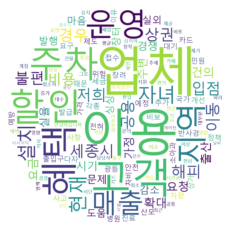

In [15]:
wd_arp_rd = WordCloud(max_font_size=250,background_color="white",mask=circle_mask,font_path='/content/drive/MyDrive/Colab Notebooks/sounds/malgun.ttf',stopwords=stopwords).generate(arp_rd_n)
fig = plt.figure()
plt.imshow(wd_arp_rd, interpolation='bilinear')
plt.axis('off')
wd_arp_rd.to_file(filename='/content/drive/MyDrive/Colab Notebooks/wordcloud_img/wd_arp_rd.jpg')